# **Regresi Linier memakai library statsmodel**

Oleh Kelompok 1:
1. Adriel Sebastian
2. Farizan Qurunnulbahri
3. Muhammad Aziz Arrazi
4. Nussa Raffiandana Sarodja
5. Syahrul Amru

# 1. Import data
Di sini kami memakai dataset Nearest Earth Objects yang didapat dari https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects.

In [ ]:
import pandas as pd
neo = pd.read_csv('/content/neo.csv')
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


#2. Membuat model OLS


Dataset ini berisi data nilai estimasi diameter, kecepatan relatif, dan jarak, untuk setiap NEO dan magnitudo absolutnya. Untuk melihat korelasi antara kecepatan relatif dan magnitudo absolutnya, ditulis kode berikut:

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula = 'absolute_magnitude~relative_velocity', data = neo).fit()
model1.params

Intercept            25.473301
relative_velocity    -0.000040
dtype: float64

Didapatkan nilai parameter model intersep α dan slope β:

α = 25.47

β = -0.00004

Persamaan untuk model ini akan menjadi sebagai berikut:

Y = α + β*X

magnitudo = 25.47 - 0.00004*kecepatan

#3. Parameter model

**a. Nilai p**

Jika nilai p sangat kecil, maka parameter memiliki nilai bukan nol dan secara statistik signifikan di dalam model.

In [ ]:
model1.pvalues

Intercept            0.0
relative_velocity    0.0
dtype: float64

**b. Nilai R^2**

In [ ]:
model1.rsquared

0.12521875685386308

**c. Semua parameter model**

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     absolute_magnitude   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 1.300e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:38   Log-Likelihood:            -2.1934e+05
No. Observations:               90836   AIC:                         4.387e+05
Df Residuals:                   90834   BIC:                         4.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.4733      0.019   1320.779      0.000      25.435      25.511
relative_velocity -4.049e-05   3.55e-07   -114.027      0.000   -4.12e-05   -3.98e-05
==============================================================================
Omnibus:                      142.104   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.721
Skew:                          -0.040   Prob(JB):                     1.36e-27
Kurtosis:                       2.838   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#4. Nilai Y dari persamaan model

Prediksi nilai magnitudo absolut berdasarkan persamaan yang telah dibuat dapat diselesaikan dengan menggunakan kode berikut:

In [ ]:
absolute_magnitude_pred = model1.predict(neo['relative_velocity'])
absolute_magnitude_pred

0        24.923891
1        22.493743
2        20.847043
3        24.470611
4        23.742879
           ...    
90831    23.364662
90832    23.606151
90833    25.166926
90834    22.671473
90835    24.379099
Length: 90836, dtype: float64

#5. Pembuatan grafik

Nilai prediksi magnitudo vs kecepatan relatif dapat diplot untuk mendapatkan garis yang menjelaskan persebaran data dan kecenderungan tren (*line of best fit*). Berikut adalah kode yang digunakan:

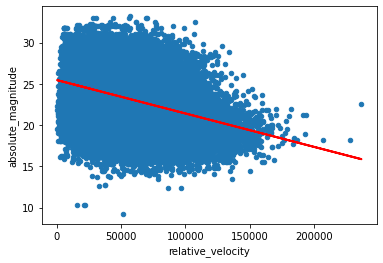

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
neo.plot(kind='scatter', x = 'relative_velocity', y = 'absolute_magnitude')
plt.plot(neo['relative_velocity'], absolute_magnitude_pred, c = 'red', linewidth = 2)

# 6. Kalkulasi RSE

Nilai RSE untuk prediksi kita dapat dicari memakai kode berikut:

In [ ]:
import numpy as np
n = len(neo.index)
p = 1
neo['absolute_magnitude_pred'] = -0.000040 * neo['relative_velocity'] + 25.473301
neo['RSE']=(neo['absolute_magnitude']-neo['absolute_magnitude_pred'])**2
RSEd = neo.sum()['RSE']
RSE = np.sqrt(RSEd/(n - p - 1))
absolute_magnitudemean = np.mean(neo['absolute_magnitude'])
error = RSE / absolute_magnitudemean
RSE, absolute_magnitudemean, error

(2.7069760613378047, 23.52710347219164, 0.11505777005390283)

Didapatkan 3 nilai, pertama adalah RSE = 2.71, kedua adalah absolute_magnitudemean (mean dari magnitudo absolut) = 23.53 dan yang ketiga adalah rasio mereka (error) yang memiliki nilai 0,115. Berarti, rata-rata model ini memiliki keakuratan 11.5 % meskipun prediksi dari koefisien benar. Error ini cukup besar. Cara untuk memperbaiki hal ini adalah mencoba menambah variabel prediktor (x).

# **Regresi linier multiple**

#1. 2 Variabel prediktor X

In [ ]:
model2=smf.ols(formula='absolute_magnitude~relative_velocity+est_diameter_max',data=neo).fit()
model2.params

Intercept            25.481888
relative_velocity    -0.000028
est_diameter_max     -2.196753
dtype: float64

In [ ]:
model2.pvalues

Intercept            0.0
relative_velocity    0.0
est_diameter_max     0.0
dtype: float64

In [ ]:
absolute_magnitude_pred=model2.predict(neo[['relative_velocity','est_diameter_max']])
absolute_magnitude_pred

0        19.220750
1        22.141869
2        18.776494
3        24.323223
4        23.047763
           ...    
90831    23.911586
90832    24.124654
90833    25.115729
90834    23.532893
90835    24.538984
Length: 90836, dtype: float64

In [ ]:
p = 2
neo['absolute_magnitude_pred'] = ((-3.426825e5) * neo['relative_velocity']) + ((-2.151697e8) * neo['est_diameter_max']) + 2.597183e1
neo['RSE']=(neo['absolute_magnitude']-neo['absolute_magnitude_pred'])**2
RSEd = neo.sum()['RSE']
RSE = np.sqrt(RSEd/(n - p - 1))
absolute_magnitudemean = np.mean(neo['absolute_magnitude'])
error = RSE / absolute_magnitudemean
RSE, absolute_magnitudemean, error

(18682877815.22424, 23.52710347219164, 794100210.3087982)

#2. 3 Variabel prediktor X

In [ ]:
model3=smf.ols(formula='absolute_magnitude~relative_velocity+est_diameter_max+miss_distance',data=neo).fit()
model3.params

Intercept            2.586372e+01
relative_velocity   -2.311539e-05
est_diameter_max    -2.156253e+00
miss_distance       -1.648687e-08
dtype: float64

In [ ]:
model3.pvalues

Intercept            0.0
relative_velocity    0.0
est_diameter_max     0.0
miss_distance        0.0
dtype: float64

In [ ]:
absolute_magnitude_pred=model3.predict(neo[['relative_velocity','est_diameter_max','miss_distance']])
absolute_magnitude_pred

0        18.868427
1        21.868201
2        18.920272
3        24.406631
4        22.883348
           ...    
90831    24.328943
90832    23.821313
90833    25.066491
90834    23.096338
90835    24.061388
Length: 90836, dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     absolute_magnitude   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:06:46   Log-Likelihood:            -2.0343e+05
No. Observations:               90836   AIC:                         4.069e+05
Df Residuals:                   90832   BIC:                         4.069e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.8637      0.018   1422.076      0.000      25.828      25.899
relative_velocity -2.312e-05   3.21e-07    -71.995      0.000   -2.37e-05   -2.25e-05
est_diameter_max     -2.1563      0.012   -185.646      0.000      -2.179      -2.133
miss_distance     -1.649e-08   3.58e-10    -46.062      0.000   -1.72e-08   -1.58e-08
==============================================================================
Omnibus:                   130787.621   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        730285869.934
Skew:                           7.594   Prob(JB):                         0.00
Kurtosis:                     441.999   Cond. No.                     1.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#**Multi-kolinearitas**

#1. Variance Inflation Factor (VIF)

VIF untuk variabel kecepatan relatif

In [ ]:
model=smf.ols(formula='relative_velocity~est_diameter_max+miss_distance',data=neo).fit()
rsquared=model.rsquared
VIF=1/(1-rsquared)
VIF

1.1605008807075758

VIF untuk variabel estimasi diameter maksimum

In [ ]:
model=smf.ols(formula='est_diameter_max~relative_velocity+miss_distance',data=neo).fit()
rsquared=model.rsquared
VIF=1/(1-rsquared)
VIF

1.0576806361654674

VIF untuk variabel jarak

In [ ]:
model=smf.ols(formula='miss_distance~relative_velocity+est_diameter_max',data=neo).fit()
rsquared=model.rsquared
VIF=1/(1-rsquared)
VIF

1.1263251494971607

Kecepatan relatif, diameter, dan jarak memiliki nilai VIF antara 1 sampai 5, sehingga terindikasi ketiganya berkorelasi menengah dan tidak perlu dieliminasi dari model.